<a href="https://colab.research.google.com/github/shehanshaman/fyp_short_sem/blob/master/Blood_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


**Features | Blood**

In [0]:
import numpy as np
import pandas as pd

df = pd.read_csv("drive/My Drive/FYP/dataset/Blood/filteredBloodWithStates.csv", index_col = 0)
df = df.T

In [0]:
# Normal 0 | AD 1
df['States'].replace('Normal', 0,inplace=True)
df['States'].replace('AD' ,1 ,inplace=True)

In [4]:
df['States'].unique()

array([0, 1])

In [0]:
df = df.rename(columns={'States': 'class'})

In [0]:
X = df.drop("class",1)   #Feature Matrix
y = df["class"]          #Target Variable

In [0]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(X)
df = pd.DataFrame(x_scaled,index=[X.index.values])

df.columns =  X.columns.values

df["class"] = y.values

In [16]:
df.head()

,6-Mar,7-Mar,ABCA1,ABCE1,ABHD4,ABTB1,ACADM,ACADVL,ACAT1,ACAT2,ACBD3,ACRBP,ACTA2,ACTN1,ACTN4,ACTR10,ACTR2,ACTR3,ACTR6,ACTRT1,ADAM8,ADCY3,ADCY4,ADD3,ADIPOR1,AGPS,AGTRAP,AHSA1,AIF1,AK3,AKAP13,AKR1C3,AKT1,ALDH3B1,ALDOC,ALG5,ALOX5AP,ALPL,ALS2CR2,ANAPC10,...,ZCCHC9,ZDHHC17,ZDHHC8,ZFP36,ZFPM1,ZFR,ZMAT2,ZMPSTE24,ZMYND11,ZNF148,ZNF17,ZNF20,ZNF213,ZNF22,ZNF277,ZNF282,ZNF302,ZNF319,ZNF324,ZNF350,ZNF364,ZNF385A,ZNF467,ZNF559,ZNF562,ZNF622,ZNF653,ZNF69,ZNF692,ZNF700,ZNF746,ZNF787,ZNF816A,ZNF91,ZNFX1,ZNHIT3,ZRANB2,ZYG11B,ZYX,class
GSM1539119,0.215330,0.605522,0.093046,0.744407,0.233247,0.310990,0.559657,0.319354,0.762599,0.564834,0.734879,0.536883,0.405644,0.217418,0.267386,0.756733,0.677819,0.707458,0.800480,0.260114,0.202513,0.188749,0.315528,0.573175,0.405564,0.636705,0.478868,1.000000,0.737370,0.534926,0.081642,0.530073,0.197622,0.382623,0.171012,0.832651,0.464718,0.345876,0.586256,0.757253,...,0.648915,0.383404,0.190635,0.329422,0.284368,0.825387,0.692089,0.673426,0.720388,0.028273,0.628787,0.431937,0.296816,0.866674,0.690519,0.225660,0.774673,0.240955,0.270741,0.536132,0.171559,0.405476,0.403419,0.791605,0.206579,0.855001,0.310510,0.626654,0.299068,0.604698,0.297465,0.393696,0.750593,0.752977,0.440283,0.724451,0.673060,0.242396,0.316923,0
GSM1539120,0.194530,0.761076,0.498505,0.705154,0.281432,0.323369,0.651854,0.131089,0.658762,0.692623,0.894309,0.464321,0.079020,0.251034,0.239171,0.951432,0.710866,0.844910,0.945101,0.182531,0.313378,0.331788,0.220657,0.745214,0.282792,0.802169,0.301959,0.553008,0.741606,0.608155,0.105141,0.405735,0.401450,0.456544,0.245052,0.736535,0.410296,0.335482,0.314694,0.752242,...,0.880306,0.675667,0.298730,0.465307,0.220597,0.627653,0.665824,0.799738,0.707951,0.402835,0.710760,0.710755,0.269372,0.787513,0.849968,0.221891,0.808060,0.000000,0.325863,0.505882,0.221966,0.224341,0.383444,0.785435,0.174495,0.759085,0.120777,0.705730,0.137242,0.852134,0.280663,0.377410,0.807567,0.711108,0.495246,0.866921,0.749438,0.304630,0.165536,0
GSM1539121,0.143397,0.519876,0.114297,0.688737,0.344611,0.244891,0.504079,0.139050,0.961238,0.585363,0.515211,0.416732,0.544266,0.277302,0.357833,0.911389,0.721264,0.512446,0.816174,0.514086,0.138997,0.326545,0.000000,0.447830,0.667880,0.517630,0.415809,0.805028,0.730937,0.751393,0.188590,0.486441,0.425200,0.334258,0.555526,0.570559,0.674107,0.382753,0.758424,1.000000,...,0.900077,0.506654,0.279099,0.475759,0.605867,0.555540,0.866960,0.615266,0.696062,0.300387,0.697942,0.487703,0.500029,0.815603,0.763905,0.390089,0.546897,0.478704,0.228819,0.620229,0.423553,0.272961,0.463429,0.390325,0.212921,0.764086,0.518693,0.300476,0.277556,0.629527,0.222837,0.581041,0.747343,0.439139,0.405083,0.805789,0.403648,0.030953,0.210658,0
GSM1539122,0.147967,0.711666,0.410548,0.735271,0.294850,0.177216,0.636236,0.328805,0.942937,0.649711,0.868653,0.574844,0.275221,0.344548,0.520590,0.855708,0.861710,0.863652,0.798650,0.165268,0.445108,0.344404,0.454603,0.709245,0.250799,0.866623,0.228534,0.769869,0.741316,0.488039,0.368445,0.513727,0.269522,0.351971,0.317823,0.988680,0.594694,0.569599,0.353200,0.747512,...,0.854781,0.589578,0.204220,0.508112,0.425224,0.682364,0.707574,0.736834,0.721769,0.438576,0.809039,0.585798,0.310217,0.638230,0.606851,0.278846,0.770794,0.480159,0.247608,0.599733,0.236704,0.356891,0.471153,0.764265,0.129742,0.860489,0.134855,0.415218,0.054190,0.815981,0.441137,0.388426,0.724068,0.648950,0.417846,0.586231,0.568727,0.239138,0.378629,0
GSM1539123,0.411354,0.611800,0.260721,0.702224,0.182289,0.232473,0.521601,0.288250,0.716824,0.779844,0.635662,0.540121,0.712740,0.427195,0.155955,0.831838,0.815648,0.526813,0.647277,0.442636,0.160134,0.440823,0.134799,0.485818,0.554850,0.829045,0.263519,0.612055,0.830229,0.485927,0.226326,0.382396,0.288361,0.356938,0.483288,0.420959,0.302660,0.464410,0.645468,0.863113,...,0.832575,0.521202,0.210104,0.356836,0.521395,0.263607,0.784768,0.638337,0.634579,0.308433,0.796972,0.476208,0.265411,0.742704,0.810537,0.000000,0.501843,0.059416,0.248963,0.695995,0.508708,0

**Features 200 | Univeriate Selection**

In [17]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(2000,'Score'))  #print 10 best features
selectedFeatures = featureScores.nlargest(200,'Score')

pd.options.mode.chained_assignment = None

df_200F = df[selectedFeatures['Specs'].values]
df_200F['class'] = y
df_200F.head()

,RPL26,NDUFA1,LOC648000,NDUFS5,LOC653658,LOC646200,TOMM7,LOC650276,CCDC72,LOC648622,NDUFB3,RPL31,LSM3,RPL17,SNRPG,LOC388621,COX7C,LOC388532,ENY2,RPL21,LOC731640,CIP29,RPL23,TXN,C14orf156,LOC653773,RPS24,KLRB1,RPS27L,RPS17,ATP5O,LOC654194,RPL36AL,DNAJA1,TBCA,ATP5J,PFDN5,PSMA4,SHFM1,MRPL51,...,MRPL33,LOC646766,PSMB1,ATP5F1,MRLC2,BEX2,DNAJC8,LARP7,SNRPB2,PPIG,IGBP1,ACAT1,RPL35,PPA1,C5orf41,DEK,RPL26L1,LOC401357,PSMA3,SRP19,RYBP,RPL35A,ANAPC13,LOC338758,SNX2,MAGOH,PRIC285,CD52,ASNSD1,C14orf166,C16orf61,RPL6,EEF1B2,C16orf7,ITGAM,CNBP,FGL2,NOLA3,C11orf1,class
GSM1539119,0.837911,0.887264,0.870107,0.847742,0.915920,0.828130,0.900345,0.902799,0.962513,0.913878,0.875816,0.866132,0.873241,0.791055,0.918831,0.778124,0.909149,0.865537,0.922310,0.876360,0.915250,0.846399,0.726604,0.909569,0.854202,0.648488,0.886536,0.761274,0.842601,0.883491,0.930174,0.745666,0.905358,0.839215,0.764388,0.770496,0.865956,0.908979,0.850794,0.870413,...,0.928047,0.781196,0.941697,0.834725,0.863698,0.641200,0.703671,0.914076,0.907450,0.559978,0.979036,0.762599,0.822982,0.722993,0.145697,0.685784,0.780727,0.278704,0.853221,0.800383,0.373000,0.667148,0.841339,0.096209,0.677786,0.964016,0.142273,0.818309,0.696804,0.686821,0.798636,0.800937,0.749831,0.361110,0.458311,0.748800,0.562209,0.747941,0.509376,NaN
GSM1539120,0.891156,0.916493,0.902817,0.852944,0.965194,0.893190,0.994879,0.952233,0.970234,0.968804,0.893823,0.835236,0.954362,0.878697,0.916888,0.926529,0.921329,0.997984,0.855921,0.897432,0.892089,0.940135,0.880390,0.821249,0.967236,0.858462,0.897015,0.900219,0.967635,0.917613,0.900525,0.824285,0.966654,0.791156,0.772402,0.813881,0.801182,0.919559,0.861356,0.844266,...,0.895294,0.857396,0.899716,0.886908,0.851118,0.730637,0.627857,0.850531,0.843781,0.833951,0.819958,0.658762,0.881139,0.814396,0.304708,0.817675,0.808575,0.139036,0.880583,0.834707,0.271501,0.822214,0.991635,0.347846,0.603051,0.753278,0.272716,0.837255,0.788436,0.758196,0.772514,0.828429,0.877513,0.182954,0.315349,1.000000,0.728264,0.770856,0.545862,NaN
GSM1539121,0.872038,0.891817,0.774588,0.843559,0.818425,0.961176,0.915860,0.904147,0.923846,0.901728,0.921507,0.732936,0.855901,0.850244,0.854799,0.678126,0.902488,0.855964,0.780810,0.877175,0.667350,0.868769,0.474037,0.822423,0.835903,0.396281,0.799003,0.885710,0.736831,0.914885,0.862692,0.885833,0.965359,0.978161,0.821180,0.853992,0.693442,0.828266,0.911039,0.973530,...,0.870196,0.736036,0.984541,0.793676,0.911750,0.633720,0.790754,0.921032,0.986466,0.705763,0.862609,0.961238,0.777415,0.825658,0.090602,0.597696,0.842522,0.100321,0.621216,0.878702,0.098729,0.925090,0.777268,0.143749,0.573269,0.889714,0.241196,0.858745,0.765664,0.515902,0.822417,0.861965,0.695233,0.214343,0.256224,0.790070,0.718416,0.738022,0.696016,NaN
GSM1539122,0.766434,0.890710,0.854753,0.678642,0.925100,0.801573,0.834396,0.878979,0.781987,0.901728,0.897913,0.802599,0.807113,0.783707,0.784234,0.737646,0.839799,0.786593,0.736202,0.659887,0.804322,0.784825,0.785831,0.740585,0.777978,0.570874,0.781590,0.799326,0.641770,0.783231,0.838883,0.714349,0.879828,0.848439,0.795555,0.702561,0.664907,0.957681,0.759757,0.878608,...,0.753668,0.536862,0.851899,0.806669,0.791302,0.490427,0.625319,0.974511,0.849601,0.787902,0.735727,0.942937,0.703910,0.524376,0.319830,0.883918,0.716511,0.364745,0.825998,0.757912,0.383296,0.686815,0.877519,0.112269,0.644629,0.794458,0.221203,0.694509,0.540224,0.622015,0.674741,0.714399,0.581930,0.213942,0.527054,0.891473,0.784359,0.725394,0.433407,NaN
GSM1539123,0.796444,0.910372,0.849083,0.769186,0.731565,0.878925,0.910961,0.867062,0.890165,0.838840,0.850972,0.699885,0.813076,0.865121,0.847413,0.644850,0.922081,0.719465,0.871133,0.799997,0.626788,0.842472,0.535098,0.748920,0.864478,0.512843,0.800773,0.663501,0.784743,0.869340,0.882344,0.778363,0.968193,1.000000,0.734024,0.857565,0.668976,1.000000,0.921050,0.890477,...,0.752060,0.762984,0.944318,0.608422,0.908986,0.730821,0.660882,0.858905,0.932285,0.596774,0.664865,0.716824,0.762236,0.731593,0.468611,0.578511,0

Selected 200 gene sysmbols

In [0]:
def saveFoundSymbols(df, name):
  tmp_df = pd.DataFrame( df.columns)
  # tmp_df.head()
  tmp_df.to_pickle("drive/My Drive/FYP/Found genes/" + name +".pkl")

# saveFoundSymbols(df_50F_FI,"blood_50_FI")
# saveFoundSymbols(df_50F_PCA,"blood_50_PCA")
# saveFoundSymbols(df_50F_RF,"blood_50_RF")

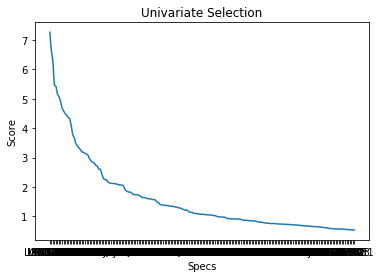

In [19]:
import matplotlib.pyplot as plt

plt.plot(  selectedFeatures["Specs"], selectedFeatures["Score"], label='linear')

plt.xlabel('Specs')
plt.ylabel('Score')
plt.title('Univariate Selection')
plt.show()

**Features 50 | PCA, RF, FI**

**PCA**

In [0]:
from sklearn import preprocessing

def dfToNorm(dataFrame):
  # Scaling features to a range [0,1]
  min_max_scaler = preprocessing.MinMaxScaler(feature_range=(1, 2))
  X_minmax = min_max_scaler.fit_transform(dataFrame)

  X_scaled = pd.DataFrame(X_minmax, columns = dataFrame.columns, index = dataFrame.index)
  return X_scaled
  
  

In [21]:
from sklearn.decomposition import PCA

X = df_200F.iloc[:,0:200].values
initial_feature_names = df_200F.columns[0:200].values

# 160 samples with 2312 features
train_features = X

model = PCA(n_components=75).fit(train_features)
X_pc = model.transform(train_features)

# number of components
n_pcs= model.components_.shape[0]

# get the index of the most important feature on EACH component i.e. largest absolute value
# using LIST COMPREHENSION HERE
most_important = [np.abs(model.components_[i]).argmax() for i in range(n_pcs)]

# get the names
most_important_names = [initial_feature_names[most_important[i]] for i in range(n_pcs)]

#print(most_important_names)
#print(df[most_important_names]) 

#df[most_important_names].to_pickle('drive/My Drive/FYP/dataset/GSE5281/GSE5281_PCA_160.plk')
#print(most_important)

df_50F_PCA = df[most_important_names]
df_50F_PCA = df_50F_PCA.T.drop_duplicates().T
df_50F_PCA.head()
#len( df_50F.columns.unique())

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(df_50F_PCA,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(df_50F_PCA.columns)

#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores.nlargest(2000,'Score'))  #print 10 best features
selectedFeatures = featureScores.nlargest(50,'Score')

pd.options.mode.chained_assignment = None

df_50F_PCA = df[selectedFeatures['Specs'].values]
df_50F_PCA.head()

df_50F_PCA_Norm = round(dfToNorm(df_50F_PCA),2)
df_50F_PCA.head()

,RPL26,GTF2H5,RPL36AL,SSB,BXDC1,RPA3,DPM1,CCDC53,LOC642989,LOC654121,MAGOH,RPL7,ZMAT2,SNRPB2,LOC653658,POLR3GL,CETN2,PSMC2,HMGB2,MRPS22,IGBP1,SRP19,DNAJC8,ACAT1,C5orf41,CD3D,PSMB1,ANXA1,C16orf7,LOC338758,SOD1,PPA1,CMTM2,ATP5C1,RPL35A,RYBP,C13orf27,CNBP,FCER1A,RPS20,S100A12,ITGAM,LOC643031,FGL2,NOLA3,ATHL1,S100P,CLC,CD52
GSM1539119,0.837911,0.841727,0.905358,0.825107,0.821022,0.720474,0.908549,0.830388,0.563404,0.832221,0.964016,0.811470,0.692089,0.907450,0.915920,0.821779,0.727446,0.964726,0.494343,0.668485,0.979036,0.800383,0.703671,0.762599,0.145697,0.843664,0.941697,0.799625,0.361110,0.096209,0.860683,0.722993,0.767889,0.874927,0.667148,0.373000,0.739311,0.748800,0.538345,0.908022,0.735701,0.458311,0.341918,0.562209,0.747941,0.305672,0.139251,0.697364,0.818309
GSM1539120,0.891156,0.937946,0.966654,0.949073,0.745303,0.993809,0.981634,0.936646,0.798499,0.921235,0.753278,0.814399,0.665824,0.843781,0.965194,0.883302,0.861133,0.741760,0.679213,0.762808,0.819958,0.834707,0.627857,0.658762,0.304708,0.762379,0.899716,0.792303,0.182954,0.347846,0.822103,0.814396,0.836274,0.996214,0.822214,0.271501,0.870064,1.000000,1.000000,0.961087,0.496906,0.315349,0.298546,0.728264,0.770856,0.299031,0.707992,1.000000,0.837255
GSM1539121,0.872038,0.838424,0.965359,0.921680,0.667507,0.923335,0.820698,0.842017,0.448816,0.725978,0.889714,0.433890,0.866960,0.986466,0.818425,0.993499,0.900718,0.910000,0.530350,0.829343,0.862609,0.878702,0.790754,0.961238,0.090602,0.893564,0.984541,0.739116,0.214343,0.143749,0.776464,0.825658,0.767889,0.799104,0.925090,0.098729,0.726256,0.790070,0.427879,0.906202,0.505161,0.256224,0.397105,0.718416,0.738022,0.225800,0.681399,0.623786,0.858745
GSM1539122,0.766434,0.789035,0.879828,0.881224,0.650430,0.788962,0.848263,0.739984,0.608536,0.944287,0.794458,0.733808,0.707574,0.849601,0.925100,0.770566,0.696101,0.782162,0.697619,0.710069,0.735727,0.757912,0.625319,0.942937,0.319830,0.857782,0.851899,0.847348,0.213942,0.112269,0.776464,0.524376,0.817215,0.880419,0.686815,0.383296,0.574382,0.891473,0.509856,0.874814,0.768868,0.527054,0.216913,0.784359,0.725394,0.375294,0.822372,0.498563,0.694509
GSM1539123,0.796444,0.746085,0.968193,1.000000,0.867470,0.823774,0.884258,0.898787,0.283938,0.756734,0.700731,0.659312,0.784768,0.932285,0.731565,0.724008,0.784941,0.755414,0.340360,0.820195,0.664865,0.909630,0.660882,0.716824,0.468611,0.711140,0.944318,0.735093,0.665490,0.116429,0.708872,0.731593,0.706591,0.806915,0.983142,0.236283,0.671303,0.719683,0.677432,0.773121,0.426767,0.097464,0.330787,0.835604,0.800879,0.595114,0.456728,0.632112,0.756796


**Random Forest**

In [0]:
from sklearn.ensemble import RandomForestClassifier

X = df_200F.drop("class",1)
y = df["class"]          #Target Variable

model = RandomForestClassifier(n_estimators=10000, random_state=42, n_jobs=-1)
model.fit(X,y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

rf_selected = feat_importances.nlargest(50)

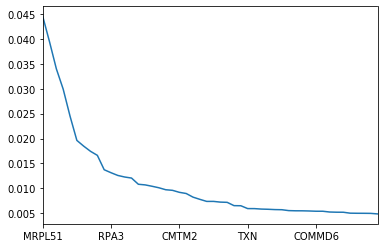

In [23]:
rf_selected.plot()

In [24]:
df_50F_RF = df[pd.DataFrame(rf_selected).T.columns]

df_50F_RF_Norm = dfToNorm(df_50F_RF)
df_50F_RF_Norm.head()

df_50F_RF_Norm = round(dfToNorm(df_50F_RF),2)
df_50F_RF_Norm.head()

,MRPL51,RPL36AL,NDUFA1,NDUFS5,CETN2,RPS25,LOC646200,SHFM1,LOC401206,ATP6V1E1,RPA3,LOC654121,RPS27A,MAGOH,LOC642989,MRPL33,HSPE1,COX17,TBCA,UQCRH,CMTM2,LSM3,BXDC1,LOC388720,C5orf41,PSMA3,LOC338758,LOC653505,LOC646766,LOC653658,TXN,GTF2H5,C16orf7,RPS3A,C15orf15,DNAJA1,ATP5O,C14orf166,DPM1,6-Mar,COMMD6,ARPC3,HINT1,SNRPB2,AIF1,UFC1,LDHB,CWC15,SRP14,METTL5
GSM1539119,1.87,1.91,1.89,1.85,1.73,1.81,1.83,1.85,1.89,1.57,1.72,1.83,1.77,1.96,1.56,1.93,1.80,1.82,1.76,1.88,1.77,1.87,1.82,1.72,1.15,1.85,1.10,1.95,1.78,1.92,1.91,1.84,1.36,1.74,1.67,1.84,1.93,1.69,1.91,1.22,1.83,1.80,1.85,1.91,1.74,1.72,1.70,1.80,1.80,1.81
GSM1539120,1.84,1.97,1.92,1.85,1.86,1.96,1.89,1.86,1.95,1.65,1.99,1.92,1.89,1.75,1.80,1.90,1.85,1.95,1.77,1.91,1.84,1.95,1.75,1.92,1.30,1.88,1.35,1.93,1.86,1.97,1.82,1.94,1.18,1.80,1.76,1.79,1.90,1.76,1.98,1.19,1.91,1.83,1.90,1.84,1.74,1.65,1.81,1.79,1.98,1.92
GSM1539121,1.97,1.97,1.89,1.84,1.90,1.96,1.96,1.91,1.81,1.77,1.92,1.73,1.76,1.89,1.45,1.87,1.76,1.89,1.82,1.83,1.77,1.86,1.67,1.92,1.09,1.62,1.14,1.80,1.74,1.82,1.82,1.84,1.21,1.59,1.63,1.98,1.86,1.52,1.82,1.14,1.88,1.81,1.87,1.99,1.73,1.87,1.57,1.76,1.82,1.89
GSM1539122,1.88,1.88,1.89,1.68,1.70,1.88,1.80,1.76,1.77,1.67,1.79,1.94,1.87,1.79,1.61,1.75,1.73,1.80,1.80,1.75,1.82,1.81,1.65,1.88,1.32,1.83,1.11,1.85,1.54,1.93,1.74,1.79,1.21,1.65,1.51,1.85,1.84,1.62,1.85,1.15,1.80,1.78,1.73,1.85,1.74,1.51,1.72,1.83,1.75,1.82
GSM1539123,1.89,1.97,1.91,1.77,1.78,1.90,1.88,1.92,1.87,1.72,1.82,1.76,1.78,1.70,1.28,1.75,1.67,1.87,1.73,1.86,1.71,1.81,1.87,1.89,1.47,1.72,1.12,1.61,1.76,1.73,1.75,1.75,1.67,1.63,1.64,2.00,1.88,1.37,1.88,1.41,1.82,1.84,1.86,1.93,1.83,1.74,1.63,1.66,1.90,1.89


**Feature Impotance**

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


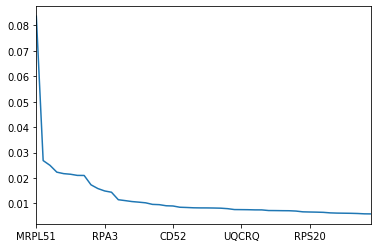

In [25]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

X = df_200F.drop("class",1)
y = df["class"]          #Target Variable
y1 = df["class"]

model = ExtraTreesClassifier()
model.fit(X,y)

#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)

fi_selected = feat_importances.nlargest(50)

fi_selected.plot()

In [26]:
df_50F_FI = df[pd.DataFrame(fi_selected).T.columns]

df_50F_FT_Norm = dfToNorm(df_50F_FI)
df_50F_FT_Norm.head()

df_50F_FI_Norm = round(dfToNorm(df_50F_FI),2)
df_50F_FI.head()

,MRPL51,DBI,HSPE1,LSM3,RPL23,COX7A2,LOC647340,ERH,RPL36AL,MRLC2,RPA3,CETN2,PSMA6,SHFM1,COMMD3,CIP29,RBX1,CMTM2,FCER1A,RPS27A,CD52,LOC646200,C1orf41,GIMAP7,TOMM7,MRPL22,NDUFS5,CWC15,LOC642989,S100P,UQCRQ,LOC341457,MRPL33,MRPS18C,CCDC53,COMMD6,HMGB2,RPS25,C14orf166,COX17,RPS20,PSMC2,CLC,ACAT1,6-Mar,LOC388621,LOC338758,LOC654121,MAP2K1IP1,LOC401206
GSM1539119,0.870413,0.916597,0.801118,0.873241,0.726604,0.929532,0.855831,0.870395,0.905358,0.863698,0.720474,0.727446,0.957264,0.850794,0.700896,0.846399,0.856533,0.767889,0.538345,0.769955,0.818309,0.828130,0.772630,0.847114,0.900345,0.860451,0.847742,0.796115,0.563404,0.139251,0.865905,0.751604,0.928047,0.825546,0.830388,0.829310,0.494343,0.810141,0.686821,0.821597,0.908022,0.964726,0.697364,0.762599,0.215330,0.778124,0.096209,0.832221,0.797701,0.886312
GSM1539120,0.844266,0.973970,0.852765,0.954362,0.880390,0.984653,0.822021,0.915818,0.966654,0.851118,0.993809,0.861133,0.942796,0.861356,0.760042,0.940135,0.887373,0.836274,1.000000,0.892235,0.837255,0.893190,0.808848,0.869540,0.994879,0.837132,0.852944,0.792052,0.798499,0.707992,0.941063,0.736198,0.895294,0.860948,0.936646,0.912788,0.679213,0.962986,0.758196,0.950658,0.961087,0.741760,1.000000,0.658762,0.194530,0.926529,0.347846,0.921235,0.883477,0.948844
GSM1539121,0.973530,0.840605,0.756597,0.855901,0.474037,0.906995,0.898708,0.918672,0.965359,0.911750,0.923335,0.900718,0.934328,0.911039,0.710048,0.868769,0.716998,0.767889,0.427879,0.762439,0.858745,0.961176,0.712988,0.868042,0.915860,0.883429,0.843559,0.755113,0.448816,0.681399,0.857706,0.845533,0.870196,0.884885,0.842017,0.878415,0.530350,0.957848,0.515902,0.890945,0.906202,0.910000,0.623786,0.961238,0.143397,0.678126,0.143749,0.725978,0.777046,0.809103
GSM1539122,0.878608,0.851501,0.734304,0.807113,0.785831,0.916550,0.860248,0.775360,0.879828,0.791302,0.788962,0.696101,0.819721,0.759757,0.715648,0.784825,0.786572,0.817215,0.509856,0.871724,0.694509,0.801573,0.732783,0.748594,0.834396,0.746744,0.678642,0.830315,0.608536,0.822372,0.802434,0.848335,0.753668,0.783815,0.739984,0.804115,0.697619,0.884118,0.622015,0.795444,0.874814,0.782162,0.498563,0.942937,0.147967,0.737646,0.112269,0.944287,0.759040,0.767510
GSM1539123,0.890477,0.815135,0.673262,0.813076,0.535098,0.960201,0.866283,0.752544,0.968193,0.908986,0.823774,0.784941,0.977495,0.921050,0.693685,0.842472,0.614320,0.706591,0.677432,0.778336,0.756796,0.878925,0.753752,0.804720,0.910961,0.744773,0.769186,0.660744,0.283938,0.456728,0.905924,0.799958,0.752060,0.891802,0.898787,0.824669,0.340360,0.903851,0.373299,0.868199,0.773121,0.755414,0.632112,0.716824,0.411354,0.644850,0.116429,0.756734,0.753317,0.870676


**Correlation Matrix with Heatmap**

In [27]:
df_50F_FI_Norm.head()

,MRPL51,DBI,HSPE1,LSM3,RPL23,COX7A2,LOC647340,ERH,RPL36AL,MRLC2,RPA3,CETN2,PSMA6,SHFM1,COMMD3,CIP29,RBX1,CMTM2,FCER1A,RPS27A,CD52,LOC646200,C1orf41,GIMAP7,TOMM7,MRPL22,NDUFS5,CWC15,LOC642989,S100P,UQCRQ,LOC341457,MRPL33,MRPS18C,CCDC53,COMMD6,HMGB2,RPS25,C14orf166,COX17,RPS20,PSMC2,CLC,ACAT1,6-Mar,LOC388621,LOC338758,LOC654121,MAP2K1IP1,LOC401206
GSM1539119,1.87,1.92,1.80,1.87,1.73,1.93,1.86,1.87,1.91,1.86,1.72,1.73,1.96,1.85,1.70,1.85,1.86,1.77,1.54,1.77,1.82,1.83,1.77,1.85,1.90,1.86,1.85,1.80,1.56,1.14,1.87,1.75,1.93,1.83,1.83,1.83,1.49,1.81,1.69,1.82,1.91,1.96,1.70,1.76,1.22,1.78,1.10,1.83,1.80,1.89
GSM1539120,1.84,1.97,1.85,1.95,1.88,1.98,1.82,1.92,1.97,1.85,1.99,1.86,1.94,1.86,1.76,1.94,1.89,1.84,2.00,1.89,1.84,1.89,1.81,1.87,1.99,1.84,1.85,1.79,1.80,1.71,1.94,1.74,1.90,1.86,1.94,1.91,1.68,1.96,1.76,1.95,1.96,1.74,2.00,1.66,1.19,1.93,1.35,1.92,1.88,1.95
GSM1539121,1.97,1.84,1.76,1.86,1.47,1.91,1.90,1.92,1.97,1.91,1.92,1.90,1.93,1.91,1.71,1.87,1.72,1.77,1.43,1.76,1.86,1.96,1.71,1.87,1.92,1.88,1.84,1.76,1.45,1.68,1.86,1.85,1.87,1.88,1.84,1.88,1.53,1.96,1.52,1.89,1.91,1.91,1.62,1.96,1.14,1.68,1.14,1.73,1.78,1.81
GSM1539122,1.88,1.85,1.73,1.81,1.79,1.92,1.86,1.78,1.88,1.79,1.79,1.70,1.82,1.76,1.72,1.78,1.79,1.82,1.51,1.87,1.69,1.80,1.73,1.75,1.83,1.75,1.68,1.83,1.61,1.82,1.80,1.85,1.75,1.78,1.74,1.80,1.70,1.88,1.62,1.80,1.87,1.78,1.50,1.94,1.15,1.74,1.11,1.94,1.76,1.77
GSM1539123,1.89,1.82,1.67,1.81,1.54,1.96,1.87,1.75,1.97,1.91,1.82,1.78,1.98,1.92,1.69,1.84,1.61,1.71,1.68,1.78,1.76,1.88,1.75,1.80,1.91,1.74,1.77,1.66,1.28,1.46,1.91,1.80,1.75,1.89,1.90,1.82,1.34,1.90,1.37,1.87,1.77,1.76,1.63,1.72,1.41,1.64,1.12,1.76,1.75,1.87


(50, 50)


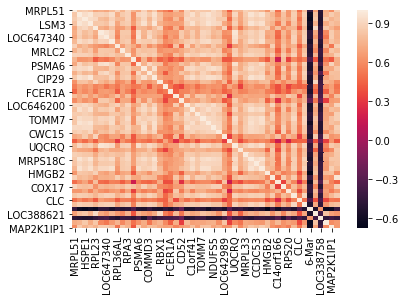

In [28]:
import seaborn as sns

#get correlations of each features in dataset
corrmat = df_50F_FI_Norm.corr()
print(corrmat.shape)
sns.heatmap(corrmat)
# top_corr_features = corrmat.index
# print(top_corr_features)
# plt.figure(figsize=(15,15))

#plot heat map
# g=sns.heatmap(df_50F_FI[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [0]:
# figure = g.get_figure()    
# figure.savefig('drive/My Drive/FYP/plots/hm_50_rf.png', dpi=400)

Classification accuracy of selected genes

In [0]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

from sklearn.model_selection import cross_val_score

def svmLinear(dataFrame, target):

  clf = svm.SVC(kernel='linear') # Linear Kernel
  scores = cross_val_score(clf, dataFrame, target, cv=3)

  return scores.mean()

from sklearn.svm import SVC

def svmGaussian(dataFrame, target):

  #Create a svm Classifier
  clf = SVC(kernel="rbf", gamma="auto", C=1)
  scores = cross_val_score(clf, dataFrame, target, cv=3)

  return scores.mean()

from sklearn.ensemble import RandomForestClassifier

def randomForest(dataFrame, target):

  #Create a svm Classifier
  clf = RandomForestClassifier(n_estimators=100, max_depth=2,random_state=42)
  scores = cross_val_score(clf, dataFrame, target, cv=3)

  return scores.mean()

def returnScoreDataFrame(dataFrame):
  lists1 = []
  lists2 = []
  lists3 = []

  for i in range(0,50):
    lists1.append(svmLinear(dataFrame.iloc[:,0:(50-i)], y))
    lists2.append(svmGaussian(dataFrame.iloc[:,0:(50-i)], y))
    lists3.append(randomForest(dataFrame.iloc[:,0:(50-i)], y))

  rows = ["svmLinear", "svmGaussian", "randomForest"]

  data = np.array([lists1, lists2,lists3])
  randomForestScore = pd.DataFrame(data=data, index=rows).transpose()

  return randomForestScore


In [0]:
randomForestScore = returnScoreDataFrame(df_50F_RF)
featureImpotanceScore = returnScoreDataFrame(df_50F_FI)
pcaScore = returnScoreDataFrame(df_50F_PCA)

In [0]:
listx = []
for i in range(0, 50):
  listx.append(str(50-i))
  
pcaScore['x'] = listx  
# pcaScore.head()

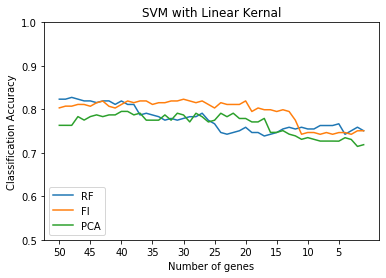

In [33]:
plt.plot(pcaScore['x'], randomForestScore["svmLinear"], label='linear')
plt.plot(pcaScore['x'], featureImpotanceScore["svmLinear"], label='linear')
plt.plot(pcaScore['x'], pcaScore["svmLinear"], label='linear')

plt.ylim(0.5, 1)

plt.legend(['RF', 'FI', 'PCA'], loc='lower left')

plt.xticks(np.arange(0, 50, 5))

plt.xlabel('Number of genes')
plt.ylabel('Classification Accuracy')
plt.title('SVM with Linear Kernal')
plt.show()

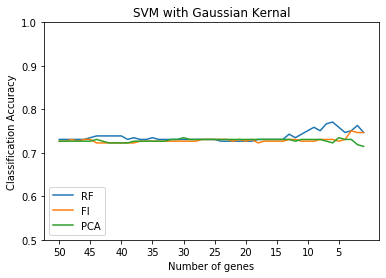

In [34]:
plt.plot(pcaScore['x'], randomForestScore["svmGaussian"], label='linear')
plt.plot(pcaScore['x'], featureImpotanceScore["svmGaussian"], label='linear')
plt.plot(pcaScore['x'], pcaScore["svmGaussian"], label='linear')

plt.xticks(np.arange(0, 50, 5))

plt.ylim(0.5, 1)

plt.legend(['RF', 'FI', 'PCA'], loc='lower left')

plt.xlabel('Number of genes')
plt.ylabel('Classification Accuracy')
plt.title('SVM with Gaussian Kernal')
plt.show()

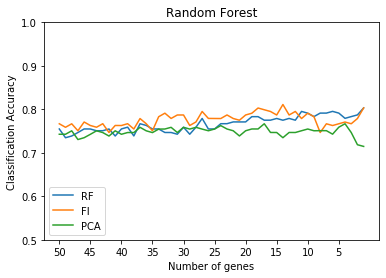

In [35]:
plt.plot(pcaScore['x'], randomForestScore["randomForest"], label='linear')
plt.plot(pcaScore['x'], featureImpotanceScore["randomForest"], label='linear')
plt.plot(pcaScore['x'], pcaScore["randomForest"], label='linear')

plt.ylim(0.5, 1.0)

plt.legend(['RF', 'FI', 'PCA'], loc='lower left')

plt.xticks(np.arange(0, 50, 5))

plt.xlabel('Number of genes')
plt.ylabel('Classification Accuracy')
plt.title('Random Forest')
plt.show()

Mutual information of selected genes

In [36]:
pip install pyitlib

  Created wheel for pyitlib: filename=pyitlib-0.2.2-cp36-none-any.whl size=28501 sha256=12fc7ce5db0d7b33e5910f5ca8a585468004d8bb5d01942cfb17dff5b7a9f955
  Stored in directory: /root/.cache/pip/wheels/1c/f8/41/f4b4e777dd6ea714f2c4900367fb479e9fca0eb000c46e73f3
Successfully built pyitlib


In [0]:
from pyitlib import discrete_random_variable as drv

# drv.entropy_conditional(df_50F_PCA_Norm['SST'], df_50F_PCA_Norm['CHGB'])

In [0]:
# A Python program to print all  
# combinations of given length 
from itertools import combinations 
from sklearn.metrics import normalized_mutual_info_score

# Get all combinations of [1, 2, 3] 
# and length 2 
combPCA = combinations(df_50F_PCA_Norm.columns, 2) 
combFI = combinations(df_50F_FI_Norm.columns, 2)
combRF = combinations(df_50F_RF_Norm.columns, 2)

# Print the obtained combinations 
miValuesPCA = []
miValuesFI = []
miValuesRF = []
for i in list(combPCA):   
    valPCA = drv.entropy_conditional(df_50F_PCA_Norm[i[0]], df_50F_PCA_Norm[i[1]],'arithmetic')
    miValuesPCA.append(valPCA)

for i in list(combFI):   
    valFI = drv.entropy_conditional(df_50F_FI_Norm[i[0]], df_50F_FI_Norm[i[1]],'arithmetic')
    miValuesFI.append(valFI)

for i in list(combRF):   
    valRF = drv.entropy_conditional(df_50F_RF_Norm[i[0]], df_50F_RF_Norm[i[1]],'arithmetic')
    miValuesRF.append(valRF)
    
# print(miValuesPCA)
# print(miValuesFI)
# print(miValuesRF)

In [39]:
print(max(miValuesPCA))
print(min(miValuesPCA))

2.2316714531709128
1.5326637283907418


In [0]:
X_plot = np.linspace(-5, 10, 1000)[:, np.newaxis]

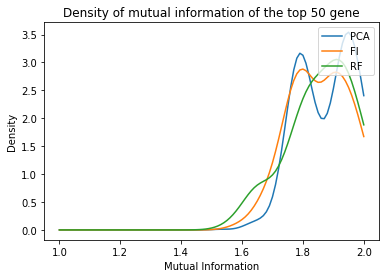

In [41]:
from scipy import stats

kernelPCA = stats.gaussian_kde(miValuesPCA)
kernelFI = stats.gaussian_kde(miValuesFI)
kernelRF = stats.gaussian_kde(miValuesRF)

ind = np.linspace(1,2,101)

kdePCA = kernelPCA.evaluate(ind)
kdeFI = kernelFI.evaluate(ind)
kdeRF = kernelRF.evaluate(ind)

plt.plot(ind, kdePCA, label='PCA')
plt.plot(ind, kdeFI, label='FI')
plt.plot(ind, kdeRF, label='RF')

plt.legend(loc='upper right')

plt.xlabel('Mutual Information')
plt.ylabel('Density')
plt.title('Density of mutual information of the top 50 gene')

plt.show()

Accuracy of six classifiers (200 genes)

In [0]:
from sklearn.model_selection import train_test_split 

from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics

from nltk.classify.scikitlearn import SklearnClassifier 

In [0]:
def printClassificationResults(X_train, X_test, y_train, y_test):
  # splitting X and y into training and testing sets 

  # X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 
    
  # training the model on training set 
  gnb_clf = GaussianNB() 
  score_gnb = cross_val_score(gnb_clf, X_train, y_train, cv=3)
  gnb_clf.fit(X_train, y_train) 

  dt_clf = DecisionTreeClassifier()
  score_dt = cross_val_score(dt_clf, X_train, y_train, cv=3)
  dt_clf.fit(X_train, y_train) 

  knn_clf = KNeighborsClassifier(n_neighbors=2)
  score_knn = cross_val_score(knn_clf, X_train, y_train, cv=3)
  knn_clf.fit(X_train, y_train)

  # svm_li_clf = SklearnClassifier(SVC(kernel='linear',probability=True))
  svm_li_clf = svm.SVC(kernel='linear') # Linear Kernel
  score_svm_li = cross_val_score(svm_li_clf, X_train, y_train, cv=3)
  svm_li_clf.fit(X_train, y_train)

  svm_rbf_clf = SVC(kernel="rbf", gamma="auto", C=1)
  score_svm_rbf = cross_val_score(svm_rbf_clf, X_train, y_train, cv=3)
  svm_rbf_clf.fit(X_train, y_train)
    
  # making predictions on the testing set 
  y_pred_gnb = gnb_clf.predict(X_test) 
  y_pred_dt = dt_clf.predict(X_test) 
  y_pred_knn = knn_clf.predict(X_test)
  y_pred_svm_li = svm_li_clf.predict(X_test)
  y_pred_svm_rbf = svm_rbf_clf.predict(X_test)

  # making predictions on the training set
  y_pred_gnb_tr = gnb_clf.predict(X_train) 
  y_pred_dt_tr = dt_clf.predict(X_train) 
  y_pred_knn_tr = knn_clf.predict(X_train)
  y_pred_svm_li_tr = svm_li_clf.predict(X_train)
  y_pred_svm_rbf_tr = svm_rbf_clf.predict(X_train)

  # ROC curves
  y_pred_proba_gnb = gnb_clf.predict_proba(X_test)[::,1]
  fpr_gnb, tpr_gnb, _ = metrics.roc_curve(y_test,  y_pred_proba_gnb)
  auc_gnb = metrics.roc_auc_score(y_test, y_pred_proba_gnb)

  y_pred_proba_dt = dt_clf.predict_proba(X_test)[::,1]
  fpr_dt, tpr_dt, _ = metrics.roc_curve(y_test,  y_pred_proba_dt)
  auc_dt = metrics.roc_auc_score(y_test, y_pred_proba_dt)

  y_pred_proba_knn = knn_clf.predict_proba(X_test)[::,1]
  fpr_knn, tpr_knn, _ = metrics.roc_curve(y_test,  y_pred_proba_knn)
  auc_knn = metrics.roc_auc_score(y_test, y_pred_proba_knn)

  # y_pred_proba_li = svm_li_clf.predict_proba(X_test)[::,1]
  # fpr_li, tpr_li, _ = metrics.roc_curve(y_test,  y_pred_proba_li)
  # auc_li = metrics.roc_auc_score(y_test, y_pred_proba_li)

  # y_pred_proba_rbf = svm_rbf_clf.predict_proba(X_test)[::,1]
  # fpr_rbf, tpr_rbf, _ = metrics.roc_curve(y_test,  y_pred_proba_rbf)
  # auc_rbf = metrics.roc_auc_score(y_test, y_pred_proba_rbf)
  
  plt.plot(fpr_gnb,tpr_gnb,label="NB, auc="+str(round(auc_gnb,2)))
  plt.plot(fpr_dt,tpr_dt,label="DT, auc="+str(round(auc_dt,2)))
  plt.plot(fpr_knn,tpr_knn,label="KNN, auc="+str(round(auc_knn,2)))
  # plt.plot(fpr_li,tpr,label="SVM + LK, auc="+str(auc_li))
  # plt.plot(fpr_rbf,tpr_rbf,label="SVM + GK, auc="+str(auc_rbf))
  
  
  plt.legend(loc=4)
  plt.show()
    
  # comparing actual response values (y_test) with predicted response values (y_pred) 
  print("\t\t\t\t\t\t Testing\t Training")
  print("Gaussian Naive Bayes model accuracy(in %) \t:", round(metrics.accuracy_score(y_test, y_pred_gnb)*100,2) ,"\t", round(score_gnb.mean()*100,2))
  print("Decision Tree model accuracy(in %) \t\t:", round(metrics.accuracy_score(y_test, y_pred_dt)*100,2) ,"\t", round(score_dt.mean()*100,2))
  print("Nearest Neighbors model accuracy(in %) \t\t:", round(metrics.accuracy_score(y_test, y_pred_knn)*100,2) ,"\t", round(score_knn.mean()*100,2))
  print("SVM + Gaussian kernel model accuracy(in %) \t:" , round(metrics.accuracy_score(y_test, y_pred_svm_rbf)*100,2) ,"\t", round(score_svm_rbf.mean()*100,2))
  print("SVM + linear kerne model accuracy(in %) \t:" , round(metrics.accuracy_score(y_test, y_pred_svm_li)*100,2) ,"\t", round(score_svm_li.mean()*100,2))

# printClassificationResults(X, X_Test, y, y_Test)

In [0]:
# Save 200 of feature data frame as plk file
# df_200F.to_pickle("drive/My Drive/FYP/dataset/Blood/Blood_200.plk")

Testing & Training Accuracy

In [45]:
df_Test = pd.read_csv("drive/My Drive/FYP/dataset/Blood/BloodTestSet.txt" , index_col = 0, delimiter="\t")
df_Test.head()

# df_Test = df_Test[df_200F.columns]

,1-Dec,1-Mar,2-Mar,3-Mar,5-Mar,6-Mar,7-Mar,8-Mar,9-Mar,A1BG,A1CF,A26C3,A2BP1,A4GALT,A4GNT,AAA1,AAAS,AACS,AACSL,AADACL1,AADACL2,AADACL4,AADAT,AAK1,AAMP,AARS,AARS2,AARSD1,AASDH,AASDHPPT,AASS,AATF,AATK,ABAT,ABCA1,ABCA10,ABCA13,ABCA2,ABCA3,ABCA5,...,ZNFX1,ZNHIT1,ZNHIT2,ZNHIT3,ZNHIT4,ZNRD1,ZNRF2,ZNRF3,ZNRF4,ZP3,ZPBP2,ZRANB1,ZRANB2,ZRANB3,ZRF1,ZSCAN12,ZSCAN16,ZSCAN18,ZSCAN2,ZSCAN21,ZSCAN22,ZSCAN29,ZSCAN5,ZSWIM1,ZSWIM3,ZSWIM4,ZSWIM5,ZSWIM6,ZUFSP,ZW10,ZWILCH,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,status
Row.names,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM1539439,6.034502,6.530754,7.129408,6.353304,6.237062,7.663660,8.886463,6.344721,6.074922,6.098149,6.010198,6.036106,6.020204,6.013066,6.233403,6.073484,6.105613,6.267063,6.127323,6.596367,6.029254,6.019374,6.042136,6.856133,6.651707,8.190474,6.557302,6.519604,6.561523,6.643611,6.137547,7.462375,6.376330,6.083295,7.743075,6.037885,6.018521,6.198357,6.083067,6.066591,...,8.026921,8.025558,6.210387,7.278433,6.360084,6.890915,6.027691,6.065618,6.030354,6.805553,6.017467,6.635804,7.520622,6.067815,6.111918,6.097101,6.832007,7.281586,6.267982,6.192664,6.004701,6.140527,6.076957,7.126713,6.160446,6.487103,6.126970,7.072409,6.385651,6.806881,6.098002,6.069826,6.228101,6.443384,6.060378,8.302944,9.218988,7.287517,6.702665,CTL
GSM1539440,6.003837,6.704646,7.331977,6.285101,6.349170,7.497356,9.166940,6.670800,5.989783,6.149894,5.999717,6.064889,6.127185,6.019198,5.999687,6.111337,6.141853,6.095868,6.211846,6.654451,6.012458,5.999596,6.039468,6.678625,6.574338,7.767905,6.399573,6.593925,6.525870,6.608622,6.218764,7.518068,6.375695,6.105703,8.124938,6.051242,5.978685,6.211247,6.072933,6.067546,...,8.190289,7.888316,6.393584,7.133672,6.093500,6.889528,6.077412,6.041635,6.009884,6.372394,6.044465,6.731751,7.457528,6.045976,6.017849,6.093071,6.849546,7.316884,6.171908,6.174047,6.023691,6.120921,6.019029,6.942820,6.163095,6.508668,6.133118,7.472342,6.442152,6.749716,6.044361,6.042657,6.169223,6.422147,6.093123,8.199601,9.661991,7.370561,6.516486,CTL
GSM1539441,6.028570,6.310005,7.282865,6.334714,6.220766,8.262519,8.578731,6.742239,6.095195,6.075191,6.004875,6.061074,6.113643,6.019371,6.126236,6.162246,6.110557,6.167965,6.165340,6.574357,6.016844,6.024649,6.027709,7.105635,6.670523,8.292259,6.686521,6.580264,6.508229,6.392527,6.101160,7.572176,6.474777,6.099433,7.749049,6.078982,6.002105,6.262194,6.122459,6.092415,...,8.249285,7.793144,6.091289,6.880806,6.339919,6.877641,6.008349,6.097530,6.026874,6.899406,6.022478,6.707771,7.193166,6.054958,6.064362,6.071359,6.860023,7.644348,6.302119,6.204376,6.064386,6.108413,6.093673,7.211082,6.123207,6.626286,6.142718,7.040188,6.338220,6.840119,6.134997,6.066001,6.143208,6.491852,6.020849,8.337439,9.257436,7.380718,6.470068,CTL
GSM1539442,6.005544,6.456523,7.041445,6.378682,6.238091,7.991071,8.653772,6.545640,6.096815,6.195223,6.049404,6.021385,6.042678,6.013483,6.123799,6.080875,6.226147,6.280903,6.097949,6.565464,6.025747,6.018809,6.041419,7.050805,6.590631,8.332112,6.637306,6.527304,6.480795,6.523693,6.053318,7.628442,6.336244,6.175635,7.993164,6.096736,5.994814,6.224123,6.236467,6.070164,...,8.345622,7.652093,6.214984,7.006905,6.310641,6.784590,6.015275,6.173338,6.041908,6.616253,6.030930,6.753361,7.369666,6.023469,6.085659,6.159440,6.740301,7.544393,6.281230,6.229450,6.034558,6.102578,6.174976,7.307547,6.141888,6.747588,6.146733,7.152450,6.329784,6.878605,6.100732,6.036524,6.213423,6.444453,6.052755,8.325404,9.616865,7.545255,6.615648,CTL
GSM1539443,6.011324,6.356256,8.554834,6.267721,6.146131,8.641615,7.963269,7.538754,6.119201,6.240271,6.189665,6.052130,6.045494,6.010488,6.102957,6.228997,6.075244,6.139687,6.167992,6.856643,6.044284,6.026085,6.119780,6.886198,6.712871,7.886157,6.571790,6.521694,6.195819,6.397912,6.071013,7.651352,6.667572,6.171534,7.146814,6.101709,6.020329,6.247390,6.115457,6.034534,...,8.279273,7.804690,6.222323,6.856534,6.158613,6.720913,6.039273,6.153633,6.030734,6.682250,6.142938,7.158371,

In [0]:
# Normal 0 | AD 1
df_Test['status'].replace('CTL', 0,inplace=True)
df_Test['status'].replace('AD' ,1 ,inplace=True)

df_Test = df_Test.rename(columns={'status': 'class'})

In [47]:
df_Test['class'].unique()

array([0, 1])

In [0]:
X = df_200F.drop("class",1)
y = df["class"]

In [0]:
df_Test = df_Test[df_200F.columns]

X_Test = df_Test.drop("class",1)
y_Test = df_Test["class"]

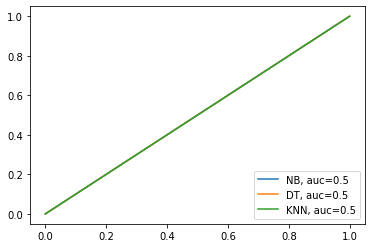

						 Testing	 Training
Gaussian Naive Bayes model accuracy(in %) 	: 49.08 	 72.26
Decision Tree model accuracy(in %) 		: 50.92 	 72.68
Nearest Neighbors model accuracy(in %) 		: 49.08 	 71.48
SVM + Gaussian kernel model accuracy(in %) 	: 49.08 	 72.28
SVM + linear kerne model accuracy(in %) 	: 49.08 	 79.53


In [50]:
printClassificationResults(X, X_Test, y, y_Test)